In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

## HDFC Life

https://www.moneycontrol.com/stocks/company_info/stock_news.php?sc_id=HSL01&scat=&pageno=2&next=0&durationType=Y&Year=2020&duration=1&news_type=

In [3]:
for i in range(1,3):
    try_url = "https://www.moneycontrol.com/stocks/company_info/stock_news.php?sc_id=HSL01&scat=&pageno="+str(i)+"&next=0&durationType=Y&Year=2020&duration=1&news_type="
    print(try_url)

https://www.moneycontrol.com/stocks/company_info/stock_news.php?sc_id=HSL01&scat=&pageno=1&next=0&durationType=Y&Year=2020&duration=1&news_type=
https://www.moneycontrol.com/stocks/company_info/stock_news.php?sc_id=HSL01&scat=&pageno=2&next=0&durationType=Y&Year=2020&duration=1&news_type=


In [4]:
from time import sleep

In [5]:
url_dict_hdfc = {}
content = []
for i in range(1,3):
    try_url = "https://www.moneycontrol.com/stocks/company_info/stock_news.php?sc_id=HSL01&scat=&pageno="+str(i)+"&next=0&durationType=Y&Year=2020&duration=1&news_type="
    response = requests.get(try_url)
    sleep(1)
    if response.status_code == 200:
        results_page = BeautifulSoup(response.content,'lxml')
        div_flr = results_page.findAll('div',attrs={'class':"MT15 PT10 PB10"})
        links = []
        for link in div_flr:
            url_all = link.find("a")
            if url_all != None:
                links.append(url_all.get("href"))
        for i in links:
            url_new = "https://www.moneycontrol.com" + i
            response_new = requests.get(url_new)
            results_page_new = BeautifulSoup(response_new.content,'lxml')
            table =  results_page_new.find('div',attrs={"class":"arti-flow"})
            p_article = table.findAll("p")
            for i in p_article:
                content.append(i.get_text())
            title_find = results_page_new.find('h1',class_="artTitle")
            title = title_find.getText() if title_find else "no title"
            time_find = results_page_new.find('div',class_="arttidate_pub")
            time_publish = time_find.getText() if time_find else "no time"
            url_dict_hdfc[url_new] = title, content, time_publish
            content = []
            
    else:
        print("Failure")

df_news_hdfc = pd.DataFrame.from_dict(url_dict_hdfc, orient = "index").reset_index()
df_news_hdfc = df_news_hdfc.rename({"index" : "URL", 0 : "Title", 1 : "Text", 2 : "Time"}, axis = 1)
df_news_hdfc["Text"] = df_news_hdfc["Text"].apply(', '.join)
df_news_hdfc

,URL,Title,Text,Time
0,https://www.moneycontrol.com/news/business/nov...,November was weak month for life insurers due ...,The month of November 2020 was weak for the li...,no time
1,https://www.moneycontrol.com/news/stocks-views...,"HCL Tech, Sun Pharma among 10 largecap names t...","The Indian market is teeming with positivity, ...",no time
2,https://www.moneycontrol.com/news/stocks-views...,Samvat 2077 | Samco Securities suggests these ...,The Indian equity market has witnessed strong ...,no time
3,https://www.moneycontrol.com/news/business/sig...,Signs of good times: Life insurers see 32% gro...,With the unlock phase being implemented across...,no time
4,https://www.moneycontrol.com/news/recommendati...,Buy HDFC Life Insurance Company; target of Rs ...,Anand Rathi 's research report on HDFC Life In...,no time
5,https://www.moneycontrol.com/news/stocks-views...,Hot Stocks | Here's why HDFC Life and Bajaj Fi...,", Indian markets began this week on a positive...",no time
6,https://www.moneycontrol.com/news/recommendati...,Buy HDFC Life Insurance Company; target of Rs ...,Geojit's research report on HDFC Life Insuranc...,no time
7,https://www.moneycontrol.com/news/recommendati...,Buy HDFC Life Insurance Company; target of Rs ...,KRChoksey's research report on HDFC Life Insur...,no time
8,https://www.moneycontrol.com/news/recommendati...,Reduce HDFC Life Insurance Company; target of ...,Prabhudas Lilladher's research report on HDFC ...,no time
9,https://www.moneycontrol.com/news/recommendati...,Accumulate HDFC Life Insurance Company; target...,Dolat Capital Market's research report on HDFC...,no time


In [6]:
df_news_hdfc.to_csv('hdfc_news.csv')
links


['/news/recommendations/neutral-hdfc-life-insurance-targetrs-600-motilal-oswal_14067421.html',
 '/news/business/hdfc-life-insurance-q1-net-profit58_14063101.html',
 '/news/business/capital-raising-committeehdfc-life-to-meetjuly-23-for-proposed-rs-600-crore-fundraising-plan_14062041.html',
 '/news/recommendations/neutral-hdfc-standard-life-insurancetargetrs-575-motilal-oswal_14056501.html',
 '/news/business/coronavirus-lockdown-life-insurers39-new-premium-down-254may-2020_13881721.html',
 '/news/business/coronavirus-crisis-|-new-premiums-for-life-insurers-down-nearly-33april-2020_13760681.html',
 '/news/business/hdfc-life-insurance-q4-net-profit-down-145-at-rs-311-crore_13713521.html',
 '/news/brokerage-results-estimates/lockdown-woes-life-insurance-business-to-takehita-usually-strong-fourth-quarter_13702621.html',
 '/news/stocks-views/hot-stocks-|-here39shdfc-life-itc-arebuythe-short-term_13656041.html',
 '/news/business/banks-take-charge-as-chief-distribution-officersprivate-life-insu

## ICICI Prudential

https://www.moneycontrol.com/stocks/company_info/stock_news.php?sc_id=IPL01&scat=&pageno=2&next=0&durationType=Y&Year=2020&duration=1&news_type=

In [7]:
for i in range(1,3):
    try_url = "https://www.moneycontrol.com/stocks/company_info/stock_news.php?sc_id=IPL01&scat=&pageno="+str(i)+"&next=0&durationType=Y&Year=2020&duration=1&news_type="
    print(try_url)

https://www.moneycontrol.com/stocks/company_info/stock_news.php?sc_id=IPL01&scat=&pageno=1&next=0&durationType=Y&Year=2020&duration=1&news_type=
https://www.moneycontrol.com/stocks/company_info/stock_news.php?sc_id=IPL01&scat=&pageno=2&next=0&durationType=Y&Year=2020&duration=1&news_type=


In [8]:
url_dict_icici = {}
content = []
for i in range(1,3):
    try_url = "https://www.moneycontrol.com/stocks/company_info/stock_news.php?sc_id=IPL01&scat=&pageno="+str(i)+"&next=0&durationType=Y&Year=2020&duration=1&news_type="
    response = requests.get(try_url)
    sleep(1)
    if response.status_code == 200:
        results_page = BeautifulSoup(response.content,'lxml')
        div_flr = results_page.findAll('div',attrs={'class':"MT15 PT10 PB10"})
        links = []
        for link in div_flr:
            url_all = link.find("a")
            if url_all != None:
                links.append(url_all.get("href"))
        for i in links:
            url_new = "https://www.moneycontrol.com" + i
            response_new = requests.get(url_new)
            results_page_new = BeautifulSoup(response_new.content,'lxml')
            table =  results_page_new.find('div',attrs={"class":"arti-flow"})
            if(table == None):
                continue
            else:
                p_article = table.findAll("p")
                #print(p_article)
                #print("\n" + "\n")
                for i in p_article:
                    content.append(i.get_text())
                title_find = results_page_new.find('h1',class_="artTitle")
                title = title_find.getText() if title_find else "no title"
                time_find = results_page_new.find('div',class_="arttidate_pub")
                time_publish = time_find.getText() if time_find else "no time"
                url_dict_icici[url_new] = title, content, time_publish
                content = []
            
            
    else:
        print("Failure")

df_news_icici = pd.DataFrame.from_dict(url_dict_icici, orient = "index").reset_index()
df_news_icici = df_news_icici.rename({"index" : "URL", 0 : "Title", 1 : "Text", 2 : "Time"}, axis = 1)
df_news_icici["Text"] = df_news_icici["Text"].apply(', '.join)
df_news_icici

,URL,Title,Text,Time
0,https://www.moneycontrol.com/news/business/ici...,ICICI Prudential's assets under management cro...,ICICI Prudential Life Insurance Company said o...,no time
1,https://www.moneycontrol.com/news/business/rbl...,"RBL Bank, ICICI Prudential Life Insurance anno...",RBL Bank has partnered ICICI Prudential Life I...,no time
2,https://www.moneycontrol.com/news/recommendati...,Buy ICICI Prudential Life Insurance; target of...,KR Choksey's research report on ICICI Prudenti...,no time
3,https://www.moneycontrol.com/news/recommendati...,Buy ICICI Pru Life; target of Rs 537: YES Secu...,YES Securities' research report on ICICI Pru L...,no time
4,https://www.moneycontrol.com/news/recommendati...,Buy ICICI Prudential Life Insurance; target of...,Sharekhan's research repor on ICICI Prudential...,no time
5,https://www.moneycontrol.com/news/recommendati...,Buy ICICI Prudential Life Insurance; target of...,Motilal Oswal's research report on ICICI Prude...,no time
6,https://www.moneycontrol.com/news/recommendati...,Hold ICICI Prudential Life Insurance Company; ...,Prabhudas Lilladher's research report on ICICI...,no time
7,https://www.moneycontrol.com/news/results/icic...,ICICI Prudentia Standalone September 2020 Net ...,", Net Sales at Rs 622.20 crore in September 20...",no time
8,https://www.moneycontrol.com/news/business/ici...,ICICI Prudential Life Insurance Q2 net profit ...,ICICI Prudential Life Insurance posted a flat ...,no time
9,https://www.moneycontrol.com/news/business/ici...,ICICI Prudential Life Insurance to raise up to...,ICICI Prudential Life Insurance on Wednesday s...,no time


In [9]:
df_news_icici.to_csv('news_icici.csv')
links

['/news/business/icici-prudential-life-insurance-q4-net-profit-down-315_13710021.html',
 '/news/stocks-views/top-buysell-ideas-by-ashwani-gujral-sudarshan-sukhani-mitesh-thakkar-for-short-term_13572841.html',
 '/news/stocks-views/icici-prudential-life-insurance-may-move-to-rs-575-anandrathi_13403821.html',
 '/news/results/icici-prudentia-standalone-december-2019-net-sales-at-rs-54807-crore3552-y-o-y_13389361.html',
 '/news/results/icici-prudentia-standalone-december-2019-net-sales-at-rs-54807-crore3552-y-o-y_13382701.html',
 '/news/business/icici-prudential-life-insurance-q3-profit-flat-at-rs-302-crore_13379481.html']

## Bajaj Allianz

https://www.moneycontrol.com/news/tags/bajaj-allianz-life-insurance.html/news/

In [10]:
try_url = "https://www.moneycontrol.com/news/tags/bajaj-allianz-life-insurance.html/news/"
response = requests.get(try_url)
response

<Response [200]>

In [11]:
url_dict_bajaj = {}
content = []


import re

'''
for tag in soup.find_all(re.compile("^value_xxx_c_1_f_8_a_")):
    print(tag.name)
'''

try_url = "https://www.moneycontrol.com/news/tags/bajaj-allianz-life-insurance.html/news/"
response = requests.get(try_url)
sleep(1)
if response.status_code == 200:
    results_page = BeautifulSoup(response.content,'lxml')
    div_flr = results_page.findAll('li',attrs={'id': re.compile("^newslist-")})
    links = []
    for link in div_flr:
        url_all = link.find("a")
        if url_all != None:
            links.append(url_all.get("href"))
    
    for i in links:
        url_new = i
        response_new = requests.get(url_new)
        results_page_new = BeautifulSoup(response_new.content,'lxml')
        table =  results_page_new.find('div',attrs={"class":"arti-flow"})
        if(table == None):
            continue
        else:
            p_article = table.findAll("p")
            #print(p_article)
            #print("\n" + "\n")
            for i in p_article:
                content.append(i.get_text())
            url_dict_bajaj[url_new] = title, content, time_publish
            title_find = results_page_new.find('h1',class_="artTitle")
            title = title_find.getText() if title_find else "no title"
            time_find = results_page_new.find('div',class_="arttidate_pub")
            time_publish = time_find.getText() if time_find else "no time"
            content = []
                    
else:
    print("Failure")

df_news_bajaj = pd.DataFrame.from_dict(url_dict_bajaj, orient = "index").reset_index()
df_news_bajaj = df_news_bajaj.rename({"index" : "URL", 0 : "Title", 1 : "Text", 2 : "Time"}, axis = 1)
df_news_bajaj["Text"] = df_news_bajaj["Text"].apply(', '.join)
df_news_bajaj

,URL,Title,Text,Time
0,https://www.moneycontrol.com/news/health-and-f...,ICICI Prudential Life Insurance Q3 profit flat...,"As a child, I could not complete 200 meters in...",no time
1,https://www.moneycontrol.com/news/business/baj...,Storyboard18 x Just Sports | Marathon Musings ...,Private sector Bajaj Allianz Life Insurance ha...,no time
2,https://www.moneycontrol.com/news/business/com...,Bajaj Allianz Life declares cash bonus to poli...,When the March 24 lockdown was announced in In...,no time
3,https://www.moneycontrol.com/news/technology/h...,Coronavirus impact | In a feet-on-street indus...,Digitization has disrupted every aspect of the...,no time
4,https://www.moneycontrol.com/news/business/baj...,How Bajaj Allianz Life Insurance reinvented br...,"Neha DaveMoneycontrol Research, Bajaj Finance ...",no time
5,https://www.moneycontrol.com/news/business/com...,Bajaj Finance & Bajaj Finserv: Strong earnings...,Chaitanya Gudipatymoneycontrol.comIf the fortn...,no time
6,https://www.moneycontrol.com/news/business/sto...,Is consolidation on the cards for insurance in...,Bajaj Finserv shares touched record high of Rs...,no time
7,https://www.moneycontrol.com/news/business/ear...,"Bajaj Finserv up 8%, may buy Allianz's stake i...",Bajaj Holdings & Investment (BHIL) reported a ...,no time
8,https://www.moneycontrol.com/news/business/com...,Bajaj Holdings & Investment Q4 net grows 7% to...,Bajaj Allianz Life Insurance said it has signe...,no time
9,https://www.moneycontrol.com/news/business/per...,Bajaj Allianz Life signs corporate agency pact...,Sampath ReddyBajaj Allianz Life InsuranceIndia...,no time


In [12]:
df_news_bajaj.to_csv('news_bajaj.csv')
links

['https://www.moneycontrol.com/news/health-and-fitness/storyboard18-x-just-sports-marathon-musings-of-a-marketer-8609061.html',
 'https://www.moneycontrol.com/news/business/bajaj-allianz-life-declares-cash-bonus-to-policyholders-for-fy20-5344301.html',
 'https://www.moneycontrol.com/news/business/companies/coronavirus-pandemic-in-a-feet-on-street-industry-heres-how-bajaj-allianz-life-insurance-has-shifted-to-virtual-sales-5154221.html',
 'https://www.moneycontrol.com/news/technology/how-bajaj-allianz-life-insurance-reinvented-branch-services-through-mosambee-4221281.html',
 'https://www.moneycontrol.com/news/business/bajaj-finance-bajaj-finserv-strong-earnings-that-justify-stock-rally-2748641.html',
 'https://www.moneycontrol.com/news/business/companies/is-consolidationthe-cards-for-insurance-industry-986694.html',
 'https://www.moneycontrol.com/news/business/stocks/bajaj-finserv8-may-buy-allianzs-stakeinsurance-units-986932.html',
 'https://www.moneycontrol.com/news/business/earnings/

# Topic Modelling

In [105]:
import nltk
from nltk import FreqDist
nltk.download('stopwords')
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

## HDFC -  Text Topic Modelling

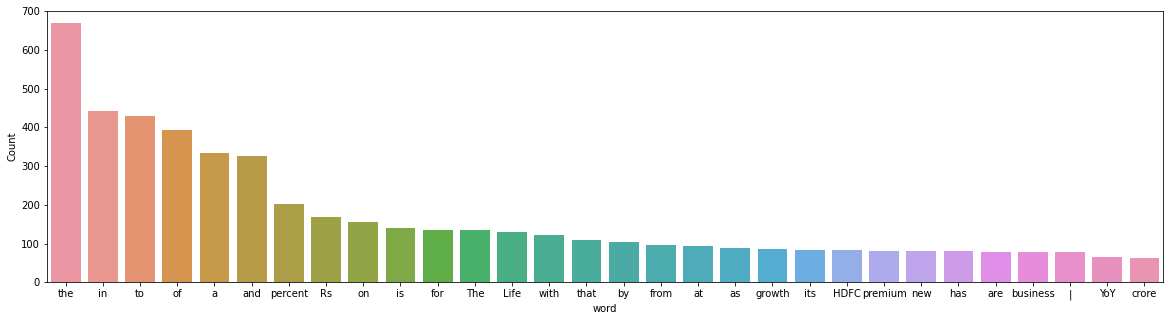

In [15]:
freq_words(df_news_hdfc["Text"])

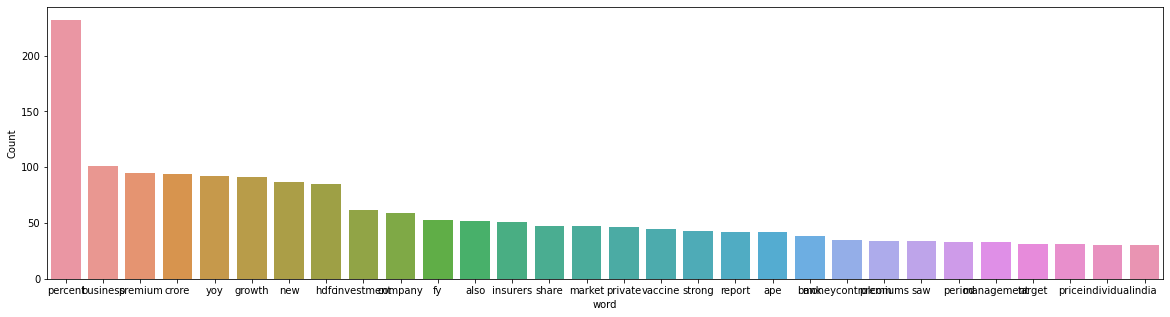

In [16]:
import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

i_stp = ["per","rs","life","insurance","said", "cent","ltd","r"]
for i in i_stp:
    stop_words.append(i)

df_news_hdfc.Text = df_news_hdfc.Text.apply(lambda x: x.lower())
df_news_hdfc.Text = df_news_hdfc.Text.apply(lambda x: x.translate(str.maketrans("","", string.punctuation)))
df_news_hdfc.Text = df_news_hdfc.Text.apply(lambda x: x.translate(str.maketrans("","", string.digits)))

def remove_stopwords(text):    
    clean_text = " ".join([i for i in text if i not in stop_words])
    return clean_text

clean_news = [remove_stopwords(r.split()) for r in df_news_hdfc["Text"]]
freq_words(clean_news)

In [17]:
import spacy


nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [18]:
tokenized_news = pd.Series(clean_news).apply(lambda x: x.split())
print(tokenized_news[1])

['indian', 'market', 'teeming', 'positivity', 'thanks', 'improving', 'macro', 'better', 'q', 'earnings', 'encouraging', 'reports', 'vaccine', 'front', 'market', 'experts', 'believe', 'positive', 'momentum', 'continue', 'new', 'samvat', 'analysts', 'brokerage', 'firms', 'bullish', 'market', 'prospects', 'events', 'us', 'election', 'positive', 'reports', 'vaccine', 'front', 'giving', 'hopes', 'soon', 'covid', 'control', 'improving', 'macroeconomic', 'indicators', 'also', 'signalling', 'bulls', 'enough', 'fodder', 'jumping', 'higher', 'global', 'brokerage', 'house', 'goldman', 'sachs', 'upgraded', 'india', 'overweight', 'raised', 'niftys', 'end', 'target', 'goldman', 'sachs', 'view', 'market', 'moved', 'higher', 'investors', 'gained', 'confidence', 'improving', 'economic', 'momentum', 'global', 'brokerage', 'firm', 'nomura', 'view', 'nifty', 'may', 'hit', 'level', 'december', 'brokerages', 'suggest', 'following', 'largecap', 'ideas', 'give', 'percent', 'samvat', 'take', 'look', 'brokerage

In [19]:
clean_news_2 = lemmatization(tokenized_news)
print(clean_news_2[1]) 

['indian', 'market', 'positivity', 'thank', 'macro', 'well', 'q', 'earning', 'report', 'vaccine', 'front', 'market', 'expert', 'positive', 'momentum', 'new', 'samvat', 'analyst', 'brokerage', 'firm', 'bullish', 'market', 'prospect', 'event', 'election', 'positive', 'report', 'vaccine', 'front', 'hope', 'covid', 'control', 'macroeconomic', 'indicator', 'bull', 'enough', 'fodder', 'high', 'global', 'brokerage', 'goldman', 'sach', 'niftys', 'end', 'target', 'goldman', 'sach', 'view', 'market', 'high', 'investor', 'confidence', 'economic', 'momentum', 'global', 'brokerage', 'firm', 'nomura', 'view', 'nifty', 'level', 'brokerage', 'largecap', 'idea', 'percent', 'brokerage', 'target', 'price', 'upside', 'brokerage', 'firm', 'company', 'domestic', 'wellness', 'business', 'high', 'single', 'digit', 'lowmid', 'teen', 'stabilisation', 'price', 'erosion', 'generic', 'business', 'strong', 'pipeline', 'growth', 'business', 'net', 'debt', 'crore', 'crore', 'wellness', 'level', 'well', 'capital', 'cy

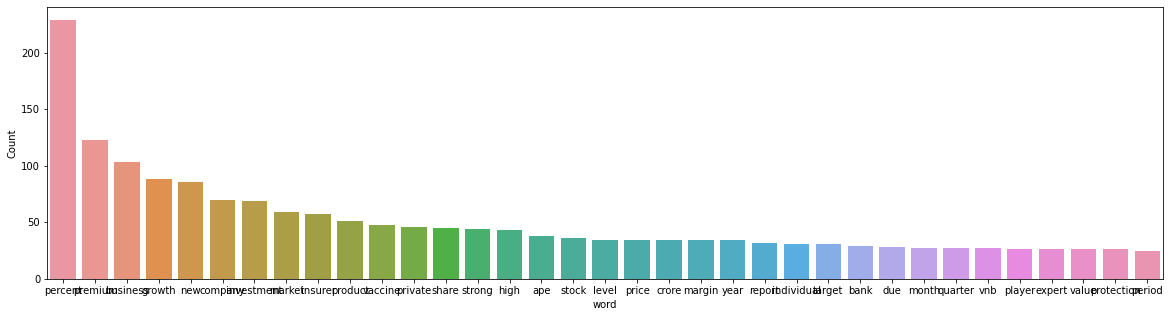

In [20]:
clean_news_3 = []
df = pd.DataFrame()
for i in range(len(clean_news_2)):
    clean_news_3.append(' '.join(clean_news_2[i]))

df["clean_news"] = clean_news_3

freq_words(df["clean_news"], 35)

## Building LDA  - Text

In [21]:
dictionary = corpora.Dictionary(clean_news_2)
doc_term_matrix = [dictionary.doc2bow(news) for news in clean_news_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [22]:
lda_model.print_topics()

[(0,
  '0.032*"investment" + 0.032*"business" + 0.022*"growth" + 0.019*"margin" + 0.018*"vnb" + 0.018*"product" + 0.017*"report" + 0.015*"mix" + 0.015*"strong" + 0.014*"ape"'),
 (1,
  '0.023*"stock" + 0.018*"level" + 0.016*"range" + 0.016*"daily" + 0.014*"target" + 0.014*"loss" + 0.014*"pattern" + 0.014*"index" + 0.014*"sharp" + 0.012*"day"'),
 (2,
  '0.034*"bank" + 0.028*"percent" + 0.023*"business" + 0.018*"private" + 0.018*"sector" + 0.015*"insurer" + 0.013*"premium" + 0.012*"company" + 0.010*"market" + 0.010*"datum"'),
 (3,
  '0.025*"level" + 0.020*"average" + 0.020*"stock" + 0.020*"price" + 0.016*"positive" + 0.014*"investment" + 0.014*"target" + 0.013*"day" + 0.013*"week" + 0.012*"market"'),
 (4,
  '0.052*"vaccine" + 0.027*"new" + 0.024*"percent" + 0.018*"premium" + 0.015*"regime" + 0.015*"people" + 0.013*"insurer" + 0.011*"tax" + 0.011*"virus" + 0.011*"person"'),
 (5,
  '0.043*"percent" + 0.022*"wrp" + 0.020*"private" + 0.019*"growth" + 0.017*"premium" + 0.016*"player" + 0.014*"

In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

c:\Python310\lib\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.104827  0.050347       1        1  45.311768
0      0.066449  0.173961       2        1  17.233700
4      0.103052 -0.195106       3        1  12.181359
2      0.052144  0.001785       4        1   8.627375
3     -0.175169  0.003932       5        1   7.420568
1     -0.191810 -0.022723       6        1   5.331992
5      0.040507 -0.012195       7        1   3.893237, topic_info=         Term        Freq       Total Category  logprob  loglift
39    percent  201.000000  201.000000  Default  30.0000  30.0000
322   vaccine   39.000000   39.000000  Default  29.0000  29.0000
17     growth   77.000000   77.000000  Default  28.0000  28.0000
44    private   38.000000   38.000000  Default  27.0000  27.0000
6    business   90.000000   90.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
42     policy    1.256174   21.061240   Topic7  -5.0914   0.4266
109     crore    1.281976   31.186026   Topic7  -5.0711   0.0544
108     covid    1.230445   18.435040   Topic7  -5.1121   0.5391
21   industry    1.199636   20.814945   Topic7  -5.1375   0.3923
23    insurer    1.199540   49.895073   Topic7  -5.1375  -0.4821

[436 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
717       2  0.825208  absolute
1087      4  0.678612    access
337       1  0.222240    action
337       4  0.222240    action
337       5  0.444479    action
...     ...       ...       ...
332       4  0.136262      year
332       7  0.068131      year
608       5  0.468110        yy
609       5  0.468110         ₹
610       5  0.468110         

[681 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 5, 3, 4, 2, 6])

## HDFC -  Headline Topic Modelling

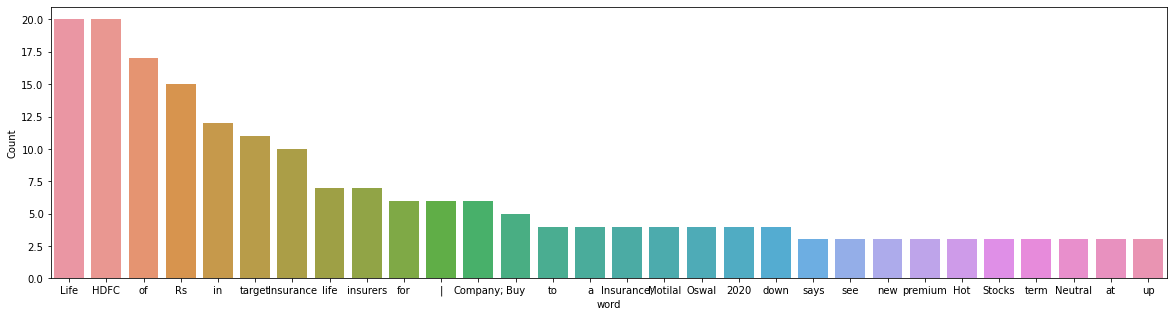

In [24]:
freq_words(df_news_hdfc["Title"])

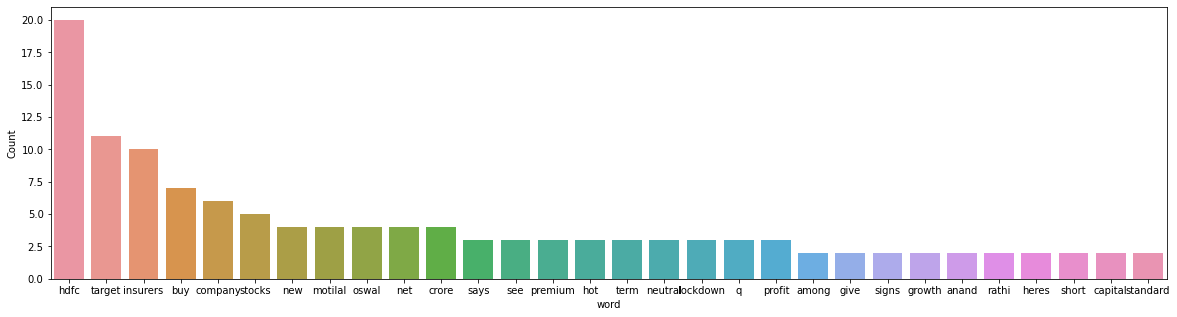

In [25]:
import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

i_stp = ["per","rs","life","insurance","said", "cent","ltd","r"]
for i in i_stp:
    stop_words.append(i)

df_news_hdfc.Title = df_news_hdfc.Title.apply(lambda x: x.lower())
df_news_hdfc.Title = df_news_hdfc.Title.apply(lambda x: x.translate(str.maketrans("","", string.punctuation)))
df_news_hdfc.Title = df_news_hdfc.Title.apply(lambda x: x.translate(str.maketrans("","", string.digits)))

def remove_stopwords(text):    
    clean_text = " ".join([i for i in text if i not in stop_words])
    return clean_text

clean_news = [remove_stopwords(r.split()) for r in df_news_hdfc["Title"]]
freq_words(clean_news)

In [26]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [27]:
tokenized_news = pd.Series(clean_news).apply(lambda x: x.split())
print(tokenized_news[1])

['hcl', 'tech', 'sun', 'pharma', 'among', 'largecap', 'names', 'give', 'returns', 'year']


In [28]:
clean_news_2 = lemmatization(tokenized_news)
print(clean_news_2[1]) 

['largecap', 'name', 'return', 'year']


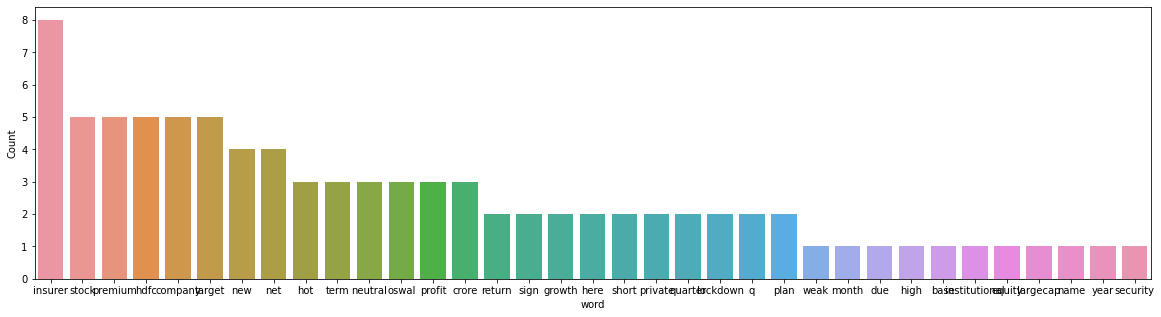

In [29]:
clean_news_3 = []
df = pd.DataFrame()
for i in range(len(clean_news_2)):
    clean_news_3.append(' '.join(clean_news_2[i]))

df["clean_news"] = clean_news_3

freq_words(df["clean_news"], 35)

## Building LDA  - Headlines

In [30]:
dictionary = corpora.Dictionary(clean_news_2)
doc_term_matrix = [dictionary.doc2bow(news) for news in clean_news_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [31]:
lda_model.print_topics()

[(0,
  '0.102*"stock" + 0.077*"hot" + 0.053*"term" + 0.053*"short" + 0.053*"here" + 0.053*"premium" + 0.053*"new" + 0.028*"coronavirus" + 0.028*"crisis" + 0.028*"portfolio"'),
 (1,
  '0.168*"net" + 0.127*"profit" + 0.087*"crore" + 0.087*"q" + 0.046*"flat" + 0.046*"vnb" + 0.006*"sale" + 0.006*"geojit" + 0.006*"premium" + 0.006*"target"'),
 (2,
  '0.099*"insurer" + 0.036*"month" + 0.036*"report" + 0.036*"black" + 0.036*"weak" + 0.036*"institutional" + 0.036*"due" + 0.036*"base" + 0.036*"high" + 0.036*"equity"'),
 (3,
  '0.131*"target" + 0.131*"company" + 0.099*"hdfc" + 0.036*"return" + 0.036*"sector" + 0.036*"attractive" + 0.036*"earning" + 0.036*"year" + 0.036*"largecap" + 0.036*"name"'),
 (4,
  '0.077*"hdfc" + 0.041*"new" + 0.041*"plan" + 0.041*"budget" + 0.041*"impact" + 0.041*"exemption" + 0.041*"regime" + 0.041*"tax" + 0.041*"removal" + 0.041*"market"'),
 (5,
  '0.099*"insurer" + 0.036*"premium" + 0.036*"new" + 0.036*"sign" + 0.036*"growth" + 0.036*"private" + 0.036*"good" + 0.036*"

In [103]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

c:\Python310\lib\site-packages\pyLDAvis\_prepare.py:244: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.000827  0.156519       1        1  19.608650
5     -0.108927  0.024795       2        1  15.308475
2     -0.094872 -0.021687       3        1  14.947963
3      0.161768  0.054679       4        1  13.960042
6     -0.090644 -0.017565       5        1  13.702790
4      0.097346 -0.049894       6        1  12.406254
1      0.034502 -0.146847       7        1  10.065827, topic_info=         Term      Freq     Total Category  logprob  loglift
41        net  2.000000  2.000000  Default  30.0000  30.0000
24    company  3.000000  3.000000  Default  29.0000  29.0000
26     target  3.000000  3.000000  Default  28.0000  28.0000
55     profit  2.000000  2.000000  Default  27.0000  27.0000
25       hdfc  3.000000  3.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
52       post  0.079706  1.283032   Topic7  -5.1534  -0.4826
12  portfolio  0.079706  1.281591   Topic7  -5.1534  -0.4815
13     rocket  0.079706  1.281591   Topic7  -5.1534  -0.4815
14   security  0.079706  1.281591   Topic7  -5.1534  -0.4815
44    private  0.079706  1.928868   Topic7  -5.1534  -0.8903

[345 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
47        4  0.816500  attractive
67        2  0.779403        bank
0         3  0.788891        base
43        3  0.788891       black
74        6  0.809681      budget
...     ...       ...         ...
73        3  0.788892  unitlinked
81        7  0.847669         vnb
7         3  0.788891        weak
66        5  0.811040         woe
11        4  0.816500        year

[102 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 3, 4, 7, 5, 2])

# Sentimental Analysis

HDFC: corpus generation

In [63]:
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from pattern.en import sentiment
import plotly.express as px
import plotly.graph_objects as go


> Following things are done on this dataset:
- Arranging the individual sentences, word from the dataset to generate a corpus
- Cleaning the corpus by removing the unneccesary annotations which can hamper our tokenization
- Transforming it using Spacy and tokenizing the data 

In [34]:

%%timeit -n 10
# nltk
df_news_hdfc.loc[:5000, "Text"].apply(lambda x: sent_tokenize(x))



3.07 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:

nlp = spacy.load("en_core_web_sm")
df_news_hdfc["Text"] = df_news_hdfc["Text"].apply(lambda x: [sent.text for sent in nlp(x).sents])



In [36]:
corpus = df_news_hdfc['Text'].sum()
corpus

['the month of november  was weak for the life insurance business due to a high base said a report by kotak institutional equities\xa0as per the report\xa0private life insurers\xa0posted a  percent yearonyear yoy decline in individual annualised premium equivalent ape in november  ape refers to  percent of regular premiums collected and  percent of single premium collection the report said the ape increase of  percent yoy in october  was on the back of a high base  the countrys largest insurer life insurance corporation of india lic reported high growth of  percent in individual ape during november  due to sunset period of some of its key policies on this high base lic reported  percent\xa0decline in november  among private insurers hdfc life max life and tata aia performed better than the industry while icici prudential life and aditya birla sun life were weak other insurers like sbi life and bajaj allianz life were broadly in line with industry averages the kotak report said that equ

**Sentiment Analysis with TextBlob**
> TextBlob is a python library for text processing and NLP, TextBLob has built-in functions for performing sentiment Analysis. The function returns a score for polarity and Subjectivity
- Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment.
- Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.

In [43]:
textblob_sentiment=[]
for s in corpus:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])


In [44]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [45]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,the month of november was weak for the life i...,-0.100569,0.523259
1,the kotak report said the marginal decline in ...,-0.005655,0.431548
2,the indian market is teeming with positivity t...,0.350000,0.350000
3,most market experts believe the positive momen...,0.045561,0.367775
4,the domestic business should deliver a low dou...,0.091439,0.386965


In [73]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_textblob['Polarity'],
                name="Polarity",
                marker_color ="#EB89B5"))
fig.add_trace(go.Histogram(x=df_textblob['Subjectivity'],
                name="Subjectivity",
                marker_color="#330C73"))

fig.update_layout(
    title_text='Plot of Polarity and Subjectivity of sentences',
    xaxis_title_text="Value",
    yaxis_title_text="Count"
)
fig.show()

c:\Python310\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Python310\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



**Sentiment Analysis with Pattern**

> Pattern is also a very useful NLP and text processing library in Python. Pattern has functions to perform sentiment analysis of a text. The good part of pattern is that it is open source. Pattern has the function which can understand the opinions and sentiment of a text.

In [54]:
pattern_sentiment=[]
for s in corpus:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])

In [74]:
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
df_pattern.head()


,Sentence,Polarity,Subjectivity
0,the month of november was weak for the life i...,-0.100569,0.523259
1,the kotak report said the marginal decline in ...,-0.005655,0.431548
2,the indian market is teeming with positivity t...,0.350000,0.350000
3,most market experts believe the positive momen...,0.045561,0.367775
4,the domestic business should deliver a low dou...,0.091439,0.386965


In [75]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_pattern['Polarity'],
                name="Polarity",
                marker_color ="#EB89B5"))
fig.add_trace(go.Histogram(x=df_pattern['Subjectivity'],
                name="Subjectivity",
                marker_color="#330C73"))

fig.update_layout(
    title_text='Plot of Polarity and Subjectivity of sentences',
    xaxis_title_text="Value",
    yaxis_title_text="Count"
)
fig.show()

c:\Python310\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Python310\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



**Word Frequency and Word Cloud**

> A good way to understand the overall opinions and ideas in the text is by analyzing the word frequency and making a word cloud. They are great ways to visualize the sentiment expressed by an article or a blog
- Starting by creating the NLTK tokenizer, the tokenizer will convert the text into individual tokens.

In [119]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

c:\Python310\lib\site-packages\pyLDAvis\_prepare.py:244: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.000827  0.156519       1        1  19.608575
5     -0.108927  0.024795       2        1  15.308454
2     -0.094872 -0.021687       3        1  14.947960
3      0.161768  0.054679       4        1  13.960106
6     -0.090644 -0.017565       5        1  13.702763
4      0.097346 -0.049894       6        1  12.406315
1      0.034502 -0.146847       7        1  10.065827, topic_info=         Term      Freq     Total Category  logprob  loglift
41        net  2.000000  2.000000  Default  30.0000  30.0000
24    company  3.000000  3.000000  Default  29.0000  29.0000
26     target  3.000000  3.000000  Default  28.0000  28.0000
55     profit  2.000000  2.000000  Default  27.0000  27.0000
25       hdfc  3.000000  3.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
52       post  0.079706  1.283032   Topic7  -5.1534  -0.4826
12  portfolio  0.079706  1.281589   Topic7  -5.1534  -0.4815
13     rocket  0.079706  1.281589   Topic7  -5.1534  -0.4815
14   security  0.079706  1.281589   Topic7  -5.1534  -0.4815
44    private  0.079706  1.928867   Topic7  -5.1534  -0.8903

[345 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
47        4  0.816498  attractive
67        2  0.779404        bank
0         3  0.788891        base
43        3  0.788891       black
74        6  0.809679      budget
...     ...       ...         ...
73        3  0.788892  unitlinked
81        7  0.847669         vnb
7         3  0.788891        weak
66        5  0.811041         woe
11        4  0.816499        year

[102 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 3, 4, 7, 5, 2])

OSError: [Errno 22] Invalid argument: 'https://cdn.jsdelivr.net/gh/bmabey/pyLDAvis@3.4.0/pyLDAvis/js/ldavis.v1.0.0.css'